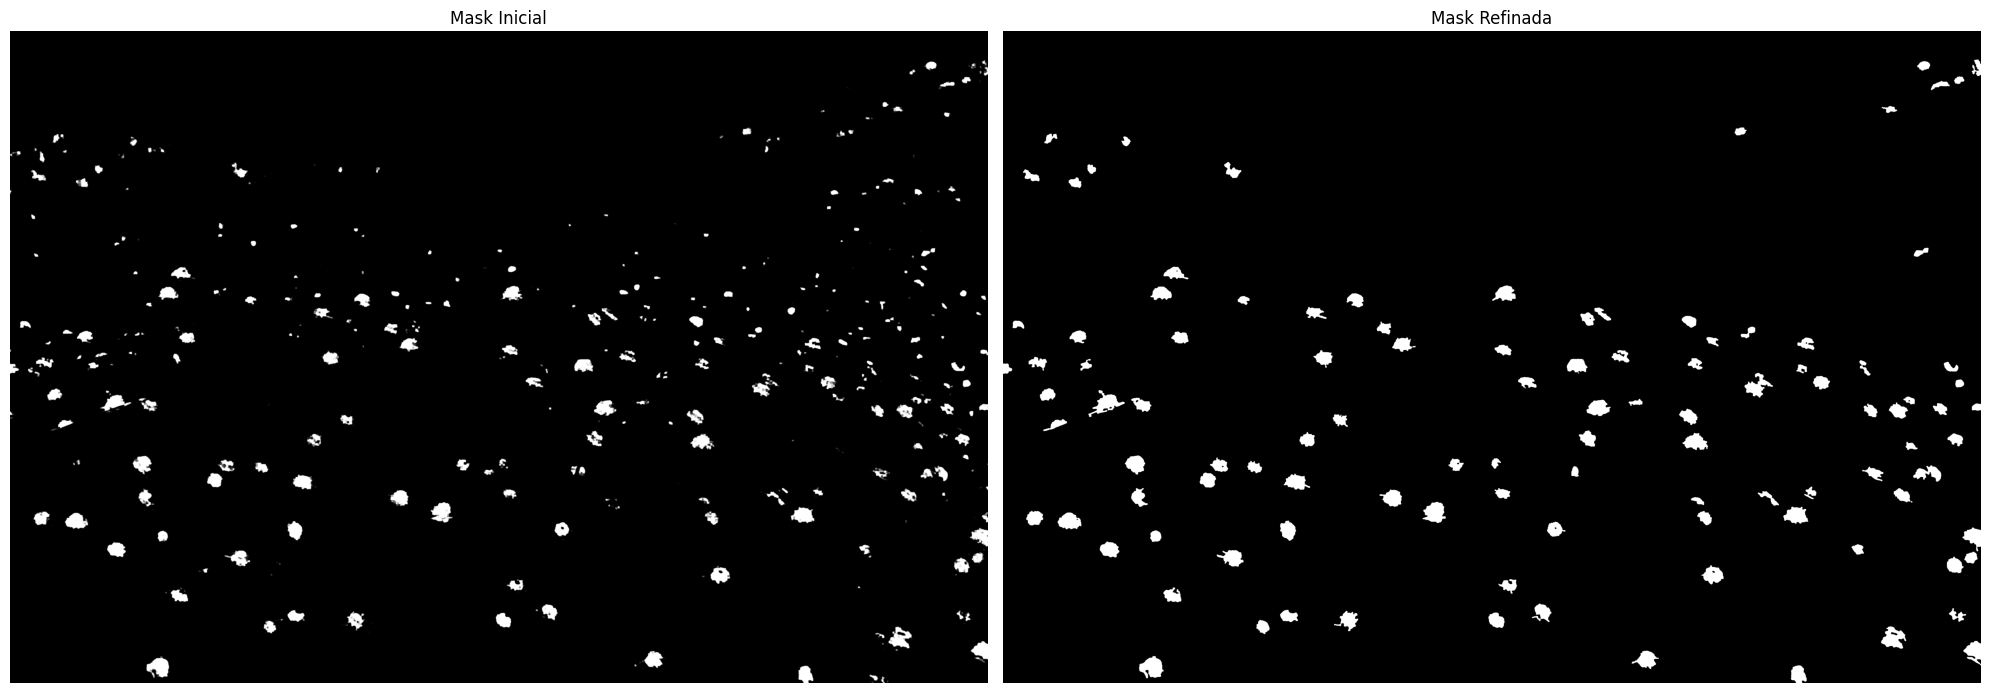

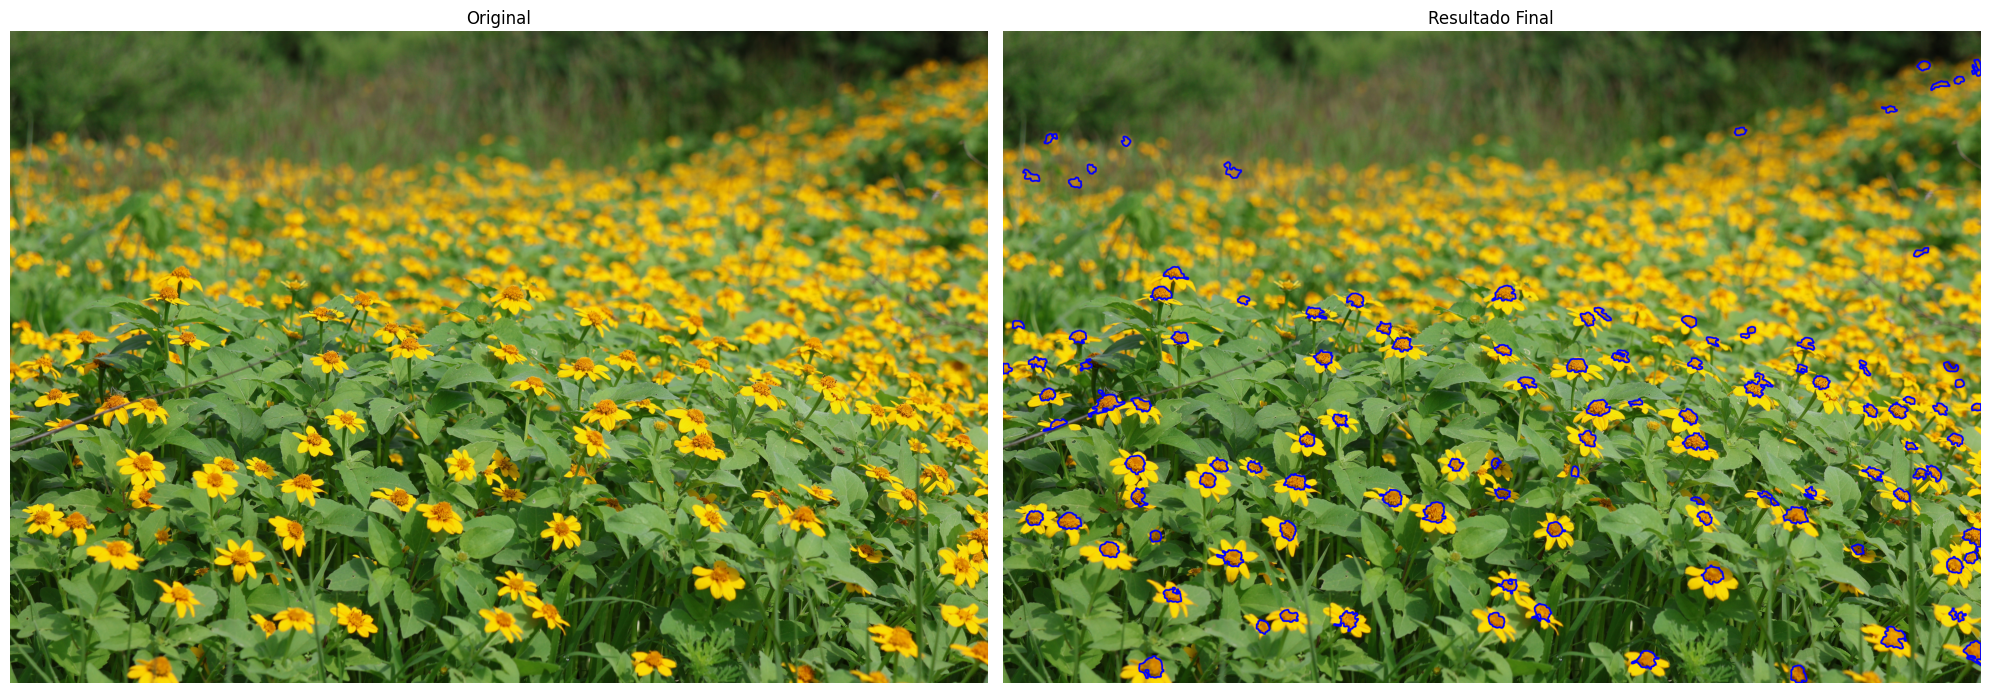

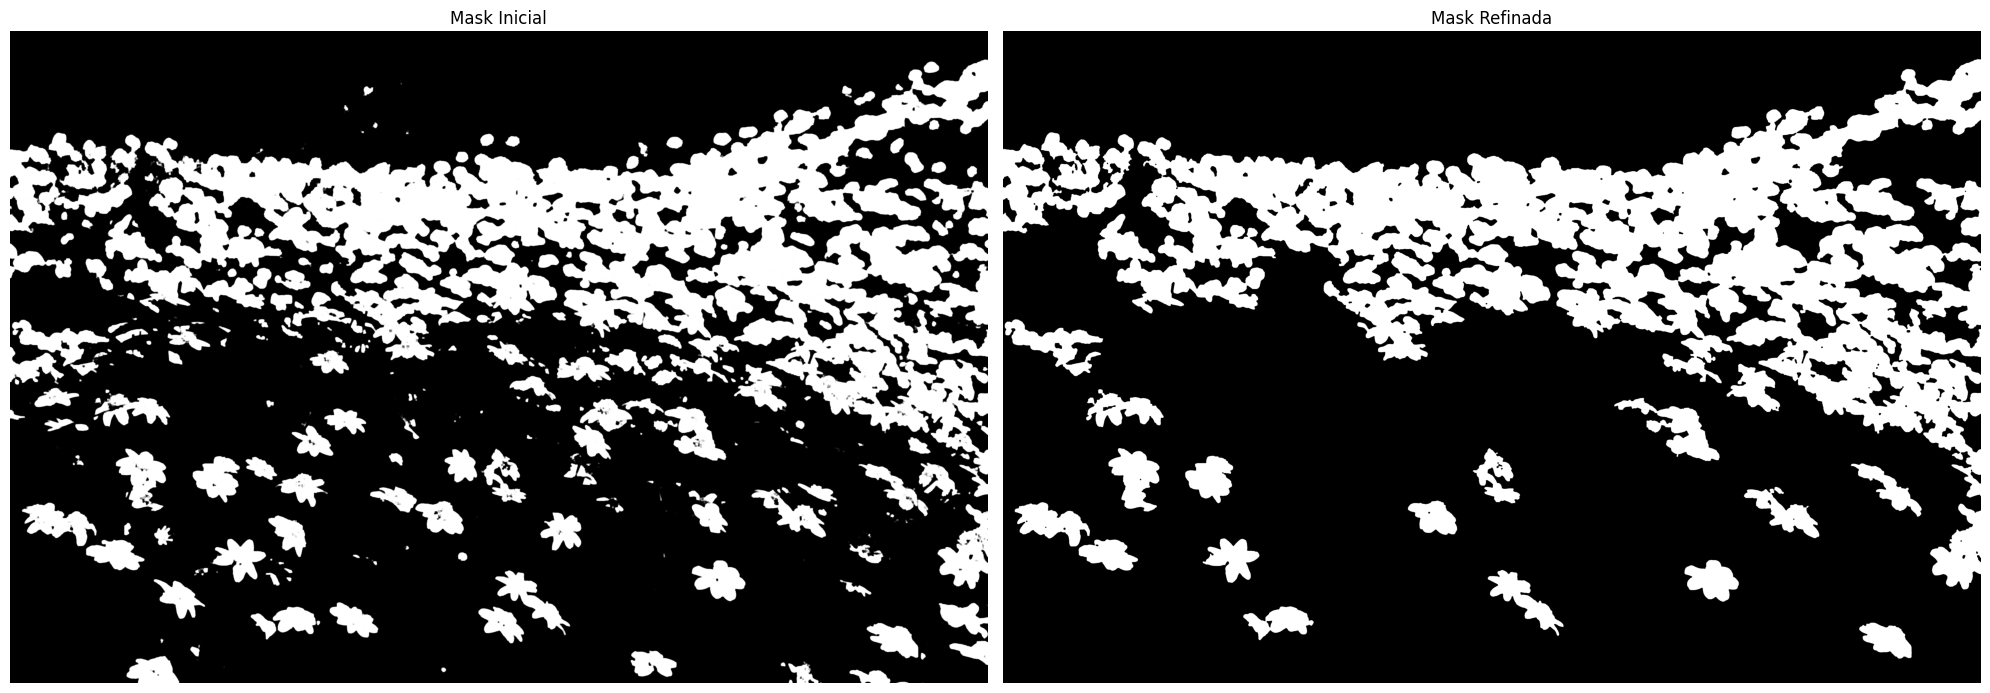

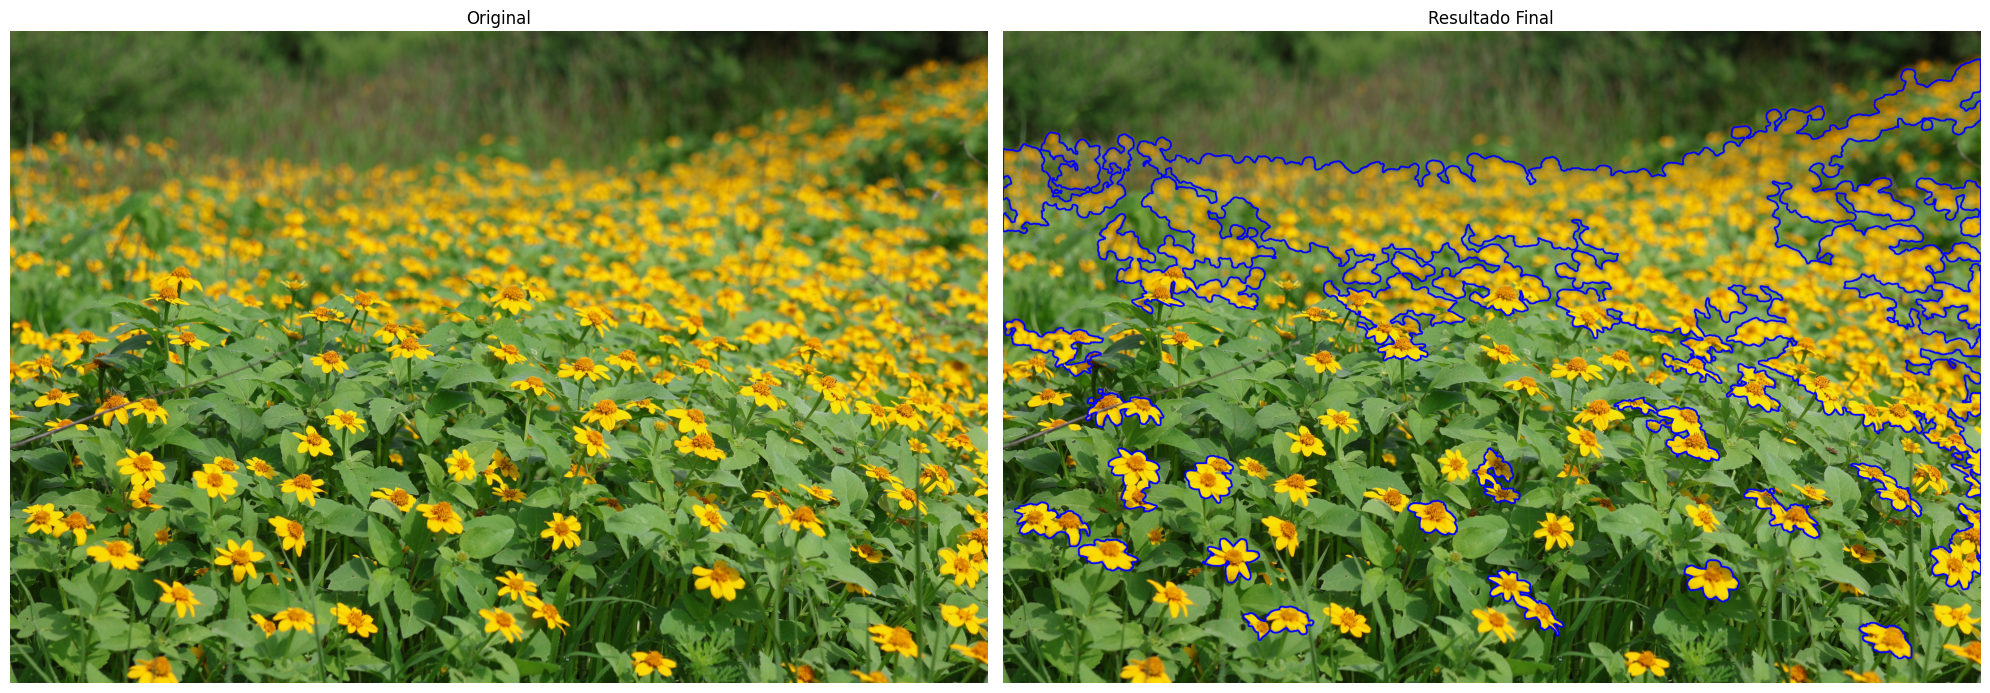

In [207]:
import cv2
import numpy as np

from computacional_perception.group_activity.utils import show_images_side_by_side
def find_flower_centroid(image):

    flowers = cv2.imread(image, cv2.IMREAD_COLOR )
    if flowers is None:
        raise ValueError("No se pudo cargar la imagen")

    flowers_suavizada = cv2.GaussianBlur(flowers, (5, 5), 0)
    flowers_smoothing = cv2.bilateralFilter(flowers_suavizada, 5, 75, 75)

    # Convertir de BGR a HSV
    flowers_hsv = cv2.cvtColor(flowers_smoothing, cv2.COLOR_BGR2HSV)

    # Ecualizar el histograma en el canal V
    h, s, v = cv2.split(flowers_hsv)
    v = cv2.equalizeHist(v)
    flowers_hsv = cv2.merge((h, s, v))


    # Definir el rango de colores para las flores amarillas (ajustar los valores segun la imagen)
    # Primer rango para tonos bajos de amarillo
    lower_yellow = np.array([10, 100, 100])
    upper_yellow = np.array([15, 255, 255])
    mask1 = cv2.inRange(flowers_hsv, lower_yellow, upper_yellow)

    # Segundo rango para tonos altos de amarillo
    lower_yellow = np.array([15, 100, 100])
    upper_yellow = np.array([20, 255, 255])
    mask2 = cv2.inRange(flowers_hsv, lower_yellow, upper_yellow)

    # Combinar las dos mascaras
    mask = mask1 + mask2

    # Definir el rango de verde (ajusta según tu imagen)
    lower_green = np.array([40, 40, 40])
    upper_green = np.array([70, 255, 255])
    mask_green = cv2.inRange(flowers_hsv, lower_green, upper_green)

    # Restar la máscara verde de la máscara original de amarillo
    mask = cv2.subtract(mask, mask_green)

    # Suavisar la mascara para reducir el ruido
    mask = cv2.GaussianBlur(mask, (5, 5), 0)

    # Operaciones morfológicas
    kernel = np.ones((7, 7), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

    # Eliminar componentes conectados pequeños
    num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(mask, connectivity=8)
    min_size = 1000  # Tamaño mínimo ajustado
    max_size = 2000  # Tamaño máximo ajustado
    new_mask = np.zeros_like(mask)

    for i in range(1, num_labels):  # Ignorar fondo
        if min_size <= stats[i, cv2.CC_STAT_AREA] >= max_size:
            new_mask[labels == i] = 255

    # Suavizar con filtro mediana
    final_mask = cv2.medianBlur(new_mask, 5)

    # Aplicar una apertura adicional para eliminar ruido pequeño
    kernel = np.ones((5, 5), np.uint8)
    final_mask = cv2.morphologyEx(final_mask, cv2.MORPH_OPEN, kernel)

    # Encontrar contornos
    contours, _ = cv2.findContours(final_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filtrar contornos por área más estricta
    filtered_contours = [c for c in contours if cv2.contourArea(c) > 1500]

    # Dibujar los contornos en la imagen original
    result = flowers.copy()
    cv2.drawContours(result, filtered_contours, -1, (255, 0, 0), 10)

    # Mostrar imágenes
    show_images_side_by_side(mask, final_mask, 'Mask Inicial', 'Mask Refinada', 10)
    show_images_side_by_side(flowers, result, 'Original', 'Resultado Final', 10)

def find_yellow_flower(image):

    flowers = cv2.imread(image, cv2.IMREAD_COLOR )
    if flowers is None:
        raise ValueError("No se pudo cargar la imagen")

    flowers_suavizada = cv2.GaussianBlur(flowers, (5, 5), 0)
    flowers_smoothing = cv2.bilateralFilter(flowers_suavizada, 5, 75, 75)

    # Convertir de BGR a HSV
    flowers_hsv = cv2.cvtColor(flowers_smoothing, cv2.COLOR_BGR2HSV)

    # Ecualizar el histograma en el canal V
    h, s, v = cv2.split(flowers_hsv)
    v = cv2.equalizeHist(v)
    flowers_hsv = cv2.merge((h, s, v))


    # Definir el rango de colores para las flores amarillas (ajustar los valores segun la imagen)

    # Primer rango para tonos bajos de amarillo
    lower_yellow = np.array([15, 100, 100])
    upper_yellow = np.array([25, 255, 255])
    mask1 = cv2.inRange(flowers_hsv, lower_yellow, upper_yellow)

    # Segundo rango para tonos altos de amarillo
    lower_yellow = np.array([25, 100, 100])
    upper_yellow = np.array([35, 255, 255])
    mask2 = cv2.inRange(flowers_hsv, lower_yellow, upper_yellow)


    # Combinar las dos mascaras
    mask = mask1 + mask2

    # Definir el rango de verde (ajusta según tu imagen)
    lower_green = np.array([40, 40, 40])
    upper_green = np.array([70, 255, 255])
    mask_green = cv2.inRange(flowers_hsv, lower_green, upper_green)

    # Restar la máscara verde de la máscara original de amarillo
    mask = cv2.subtract(mask, mask_green)

    # Suavisar la mascara para reducir el ruido
    mask = cv2.GaussianBlur(mask, (5, 5), 0)

    # Operaciones morfológicas
    kernel = np.ones((7, 7), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

    # Eliminar componentes conectados pequeños
    num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(mask, connectivity=8)
    min_size = 1000  # Tamaño mínimo ajustado
    max_size = 40000  # Tamaño máximo ajustado
    new_mask = np.zeros_like(mask)

    for i in range(1, num_labels):  # Ignorar fondo
        if min_size <= stats[i, cv2.CC_STAT_AREA] >= max_size:
            new_mask[labels == i] = 255

    # Suavizar con filtro mediana
    final_mask = cv2.medianBlur(new_mask, 5)

    # Aplicar una apertura adicional para eliminar ruido pequeño
    kernel = np.ones((5, 5), np.uint8)
    final_mask = cv2.morphologyEx(final_mask, cv2.MORPH_OPEN, kernel)

    # Encontrar contornos
    contours, _ = cv2.findContours(final_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filtrar contornos por área más estricta
    filtered_contours = [c for c in contours if cv2.contourArea(c) > 1500]

    # Dibujar los contornos en la imagen original
    result = flowers.copy()
    cv2.drawContours(result, filtered_contours, -1, (255, 0, 0), 10)

    # Mostrar imágenes
    show_images_side_by_side(mask, final_mask, 'Mask Inicial', 'Mask Refinada', 10)
    show_images_side_by_side(flowers, result, 'Original', 'Resultado Final', 10)


find_flower_centroid('./land_of_flowers.jpg')
find_yellow_flower('./land_of_flowers.jpg')


In [209]:
import requests

url = "https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth"
model_path = "sam_vit_h_4b8939.pth"

response = requests.get(url, stream=True)
with open(model_path, "wb") as file:
    for chunk in response.iter_content(chunk_size=8192):
        file.write(chunk)

print("Modelo descargado exitosamente.")

Modelo descargado exitosamente.


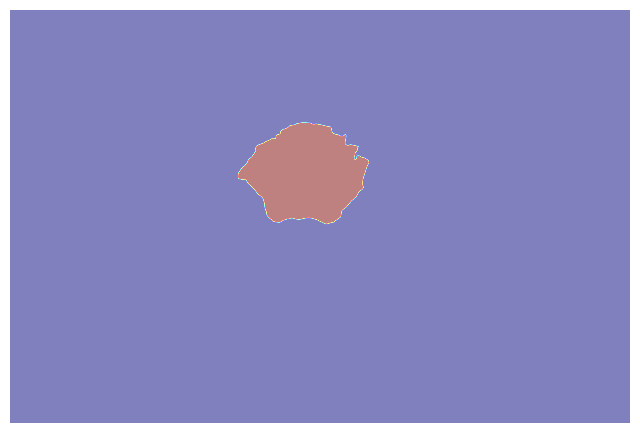

In [211]:
from segment_anything import sam_model_registry, SamPredictor
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar el modelo SAM con los pesos preentrenados
sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda" if torch.cuda.is_available() else "cpu"
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint).to(device)
predictor = SamPredictor(sam)

# Cargar imagen de prueba
image_path = "single_yellow_flower.JPG"
image = cv2.imread(image_path)
if image is None:
    raise ValueError("No se pudo cargar la imagen.")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
predictor.set_image(image)

# Seleccionar un punto manualmente en el centro de la imagen
input_point = np.array([[image.shape[1] // 2, image.shape[0] // 2]])
input_label = np.array([1])  # 1 indica que es un punto positivo (deseamos segmentar este objeto)

# Obtener máscara de segmentación de SAM
masks, _, _ = predictor.predict(point_coords=input_point, point_labels=input_label)



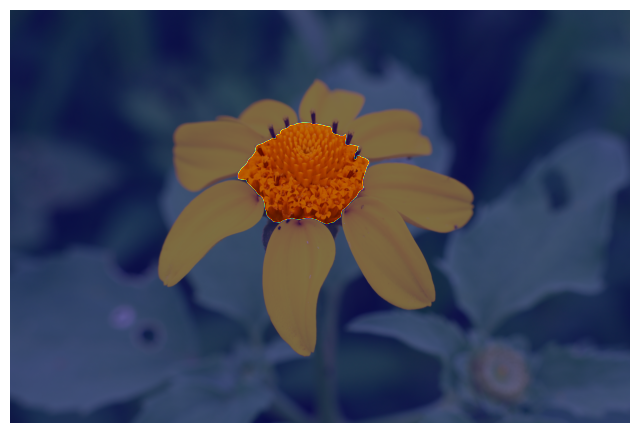

In [214]:
# Mostrar resultado
plt.figure(figsize=(8, 6))
plt.imshow(image)
plt.imshow(masks[0], alpha=0.5, cmap="jet")  # Superponer la máscara sobre la imagen
plt.axis("off")
plt.show()

In [ ]:
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

# Cargar el modelo SAM con los pesos preentrenados
sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda" if torch.cuda.is_available() else "cpu"
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint).to(device)

# Crear el generador de máscaras automáticas
mask_generator = SamAutomaticMaskGenerator(sam)

# Cargar imagen de prueba
image_path = "single_yellow_flower.JPG"
image = cv2.imread(image_path)
if image is None:
    raise ValueError("No se pudo cargar la imagen.")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Generar las máscaras automáticamente
masks = mask_generator.generate(image)

# Dibujar las máscaras sobre la imagen original
def visualize_masks(image, masks):
    plt.figure(figsize=(8, 6))
    plt.imshow(image)

    # Dibujar cada máscara con un color aleatorio
    for mask in masks:
        color = [random.random(), random.random(), random.random()]  # Color aleatorio
        plt.imshow(mask["segmentation"], alpha=0.5, cmap="jet")

    plt.axis("off")
    plt.show()

# Mostrar la segmentación automática
visualize_masks(image, masks)